# Modelado Matemático

**Carlos Andrés Bautista Torres**

código: 2208057

<img src="portada.jpg" width="150%" align="center" >

## Modelo SIDRM
Primero renombramos la variable que antes denominabamos como **_recuperados_** y la llamamos **_desinfectados_**.

$\begin{eqnarray} &\frac{dS}{dt}& = - \beta IS, \\ &\frac{dI}{dt}& = \beta IS - \gamma I, \\& \frac{dD}{dt}& = \gamma I.
\end{eqnarray}$

Luego se consideran las personas **_desinfectadas_** como la suma entre personas **_recuperadas_** y **_muertas_**.

$D = R + M \rightarrow\:\: \frac{dD}{dt} = \gamma I = \frac{dR}{dt} + \frac{dM}{dt}$.

Tanto los _**recuperados**_ como los _**muertos**_ dependen de los infectados, entonces

$\frac{dR}{dt} = \rho I \: $ y $\: \frac{dM}{dt} = \sigma I$, donde se cumple que $\:\gamma = \rho + \sigma$.

La proporción de los parámetros $\rho\:$ y $\: \sigma\:$ dependerán de factores como disponibilidad de hospitales o cantidad de personas de la tercera edad...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def new(beta, gamma, rho, sigma, S, I, D, R, M, dt): # función que calcula el valor de cada variable SIDRM a cada paso.
    
    dR = (rho*I)*dt
    R_new = R + dR
    
    dM = (sigma*I)*dt
    M_new = M + dM
    
    dD = (gamma*I)*dt
    D_new = D + dD
    
    dS = (-beta*I*S)*dt
    S_new = S + dS
    
    I_new = 1 -S_new - D_new
    return S_new, I_new, D_new, R_new, M_new

In [4]:
def plot_it(t, S, I, D, R, M): # Función usada para plotear las diferentes variables
    plt.plot(t ,S,"b", label = "Susceptibles")
    plt.plot(t, I,"r", label = "Infectadas")
    plt.plot(t, D,"g", label = "Desinfectadas")
    plt.plot(t, R,"y", label = "Recuperadas")
    plt.plot(t, M,"k", label = "Fallecidas")
    plt.legend(loc=2)
    plt.grid()
    plt.show
    plt.title("Modelo SIDRM")
    return()

In [116]:
''' 
no incluyo la función plot_it en el main porque así es más fácil realizar un multiplot 
con diferentes parámetros beta y gamma.
'''
def main(beta, gamma, tmax, dt): 
    S = [0.99999]
    I = [0.00001]
    D = [0]
    R = [0]
    M = [0]
    rho   = 0.9*gamma
    sigma = 0.1*gamma
    t = np.arange(0, tmax + dt, dt)# va hasta tmax + dt debido a que arange, siempre llega a un paso antes del máximo.
    for i in range(t.size -1): # el comando size cuenta desde 1 y el tiempo va desde cero, por eso es t.size - 1.
        S_new, I_new, D_new, R_new, M_new = new(beta, gamma, rho, sigma, S[i],I[i],D[i],R[i],M[i],dt)
        
        S.append(S_new)
        I.append(I_new)
        D.append(D_new)
        R.append(R_new)
        M.append(M_new)
    return t, S, I, D, R, M


()

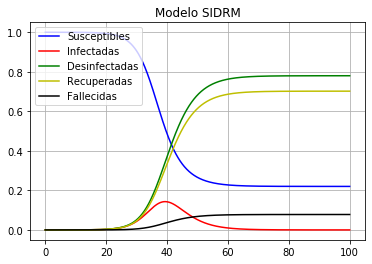

In [117]:
a = main(0.6, 0.31, 100, 0.1)
plot_it(a[0], a[1], a[2], a[3], a[4], a[5])

#        ------------------------ Analizando los parámetros $\beta$ y $\gamma$. ------------------------

#### Primero vamos a observar como varía la curva de infectados cuando se aumenta el valor del parámetro $\gamma$, a un $\beta$ constante.

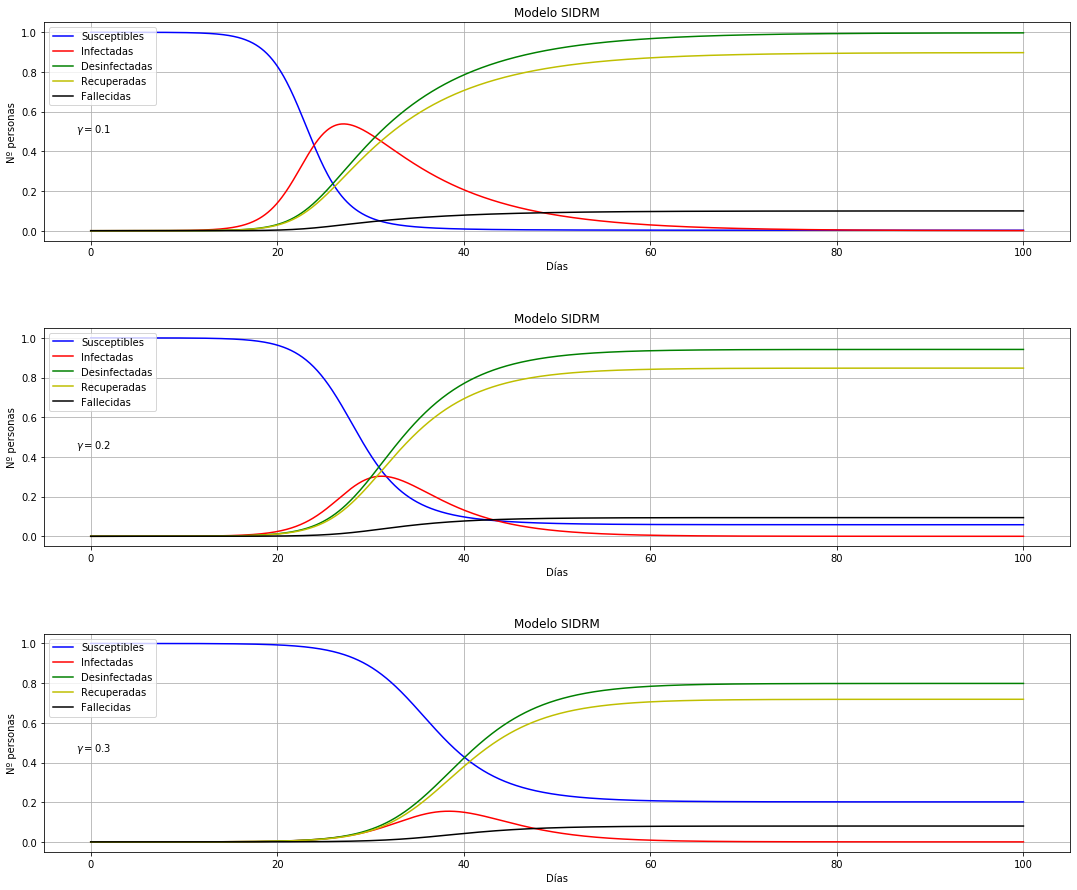

In [149]:
# # ------------------- Aquí defino los diferentes parámetros con los que quiero plotear. -------------------------

a = main(0.6, 0.1, 100, 0.1)
b = main(0.6, 0.2, 100, 0.1)
c = main(0.6, 0.3, 100, 0.1)

# ----------------------------subplot(filas, columnas, número de la gráfica) ----------------------------
plt.subplot(3, 1, 1)
plot_it(a[0], a[1], a[2], a[3], a[4], a[5])
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.figtext(0.2, 0.5, "$\gamma = 0.1$") # indica la posición en el multiplot donde va a quedar el texto

plt.subplot(3, 1, 2)
plot_it(b[0], b[1], b[2], b[3], b[4], b[5])
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.figtext(0.2, -0.6, "$\gamma = 0.2$")

plt.subplot(3, 1, 3)
plot_it(c[0], c[1], c[2], c[3], c[4], c[5])
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.figtext(0.2, -1.65, "$\gamma = 0.3$")

plt.subplots_adjust(left=None, bottom=-2, right=2.5, top=None, wspace=None, hspace=0.4)
plt.show()

#### _Se puede observar cómo el parámetro $\gamma$ juega un papel importante en la altitud del pico máximo de infectados, y por consiguiente, en la cantidad de fallecidos._ mientras mejor sea la taza de recuperación ($\gamma$), menor será el pico de infectados y se dará en un intervalo de tiempo mayor después de la primer infección. Además, entre mayor es el $\gamma$, más rápido se estabi

#### Ahora vamos a observar como varía la curva de infectados cuando se aumenta el valor del parámetro $\beta$, a un $\gamma$ constante.

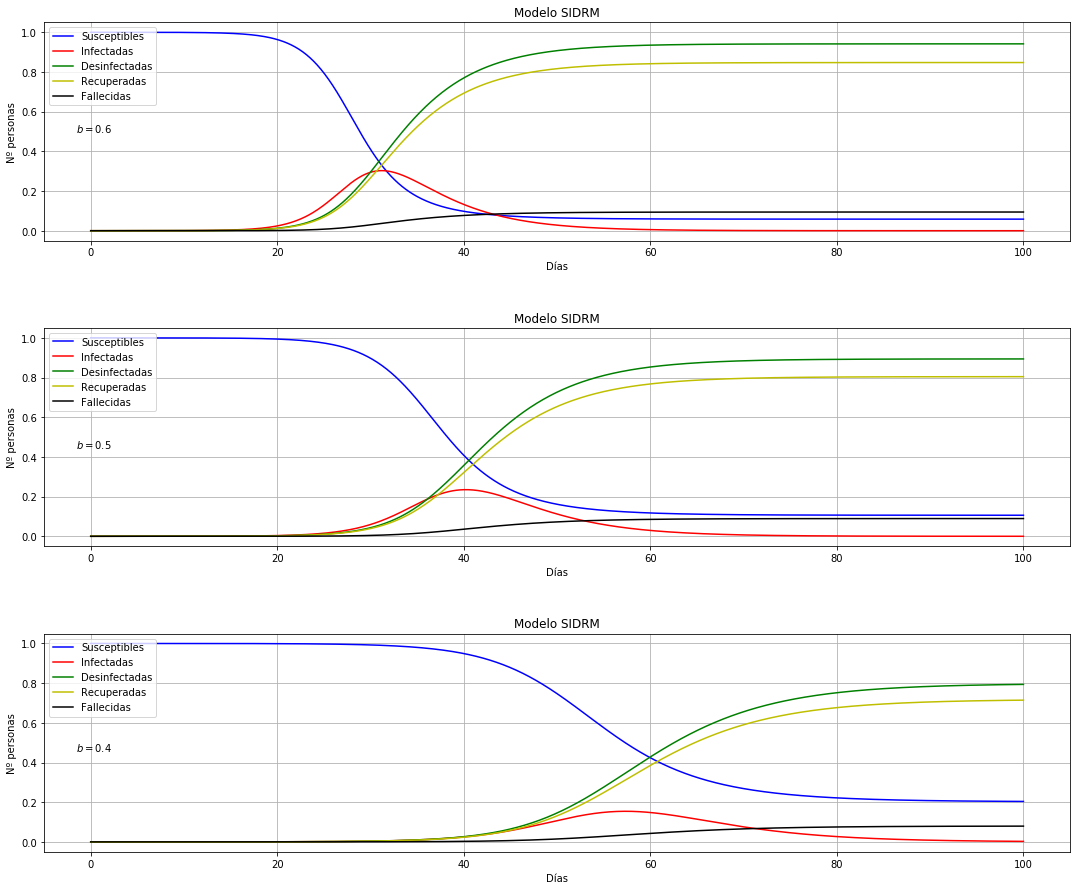

In [151]:
# # ------------------- Aquí defino los diferentes parámetros con los que quiero plotear. -------------------------

e = main(0.6, 0.2, 100, 0.1)
f = main(0.5, 0.2, 100, 0.1)
g = main(0.4, 0.2, 100, 0.1)

# ----------------------------subplot(filas, columnas, número de la gráfica) ----------------------------
plt.subplot(3, 1, 1)
plot_it(e[0], e[1], e[2], e[3], e[4], e[5])
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.figtext(0.2, 0.5, "$b = 0.6$") # indica la posición en el multiplot donde va a quedar el texto

plt.subplot(3, 1, 2)
plot_it(f[0], f[1], f[2], f[3], f[4], f[5])
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.figtext(0.2, -0.6, "$b = 0.5$")

plt.subplot(3, 1, 3)
plot_it(g[0], g[1], g[2], g[3], g[4], g[5])
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.figtext(0.2, -1.65, "$b = 0.4$")

plt.subplots_adjust(left=None, bottom=-2, right=2.5, top=None, wspace=None, hspace=0.4)
plt.show()

#### A medida que $\beta$ disminuye, vemos un comportamiento de la curva roja similar al caso anterior con $\gamma$ aumentando, lo cual tiene sentido, ya que $\beta$ se asocia con la tasa de infección y $\gamma$ con la taza de recuperación. 